In [1]:
import numpy as np
import pandas as pd

In [2]:
Train = pd.read_csv('loan-train.csv')
Test = pd.read_csv('loan-test.csv')

In [3]:
Train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
Train.shape

(614, 13)

In [5]:
len(Train.columns)

13

In [6]:
Train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
Train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [8]:
# when we apply the label encoding in those column who have a null value then label encoding automatically replacing the null value with any integer with will praduce the wrong answer
Train['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [9]:
Train['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [10]:
Train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [11]:
print(Train['Credit_History'].unique())

[ 1.  0. nan]


In [12]:
# Here we are changing only those value who have null in it's column and who is present in the form of string
Train.Gender = Train.Gender.replace({"Male": 1, "Female" : 0})
Test.Gender = Test.Gender.replace({"Male": 1, "Female" : 0})

Train.Married = Train.Married.replace({"Yes": 1, "No" : 0})
Test.Married = Test.Married.replace({"Yes": 1, "No" : 0})

Train.Self_Employed = Train.Self_Employed.replace({"Yes": 1, "No" : 0})
Test.Self_Employed = Test.Self_Employed.replace({"Yes": 1, "No" : 0})


In [13]:
# Here with the help of this module we are chaning only those column who don't have null value and who is present in the form of string
# Property_Area ----> Urban/ Semi-Urban/ Rural

from sklearn.preprocessing import LabelEncoder
feature_col = ['Education','Property_Area']

for col in feature_col:
    Train[col] = LabelEncoder().fit_transform(Train[col])
    Test[col] = LabelEncoder().fit_transform(Test[col])
    

In [14]:
Train.Loan_Status = Train.Loan_Status.replace({"Y": 1, "N" : 0})
Train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,0,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,0,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,0,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,1,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,0,0.0,6000,0.0,141.0,360.0,1.0,2,1


In [15]:
Test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1.0,1,0,0,0.0,5720,0,110.0,360.0,1.0,2
1,LP001022,1.0,1,1,0,0.0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1.0,1,2,0,0.0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1.0,1,2,0,0.0,2340,2546,100.0,360.0,NaN,2
4,LP001051,1.0,0,0,1,0.0,3276,0,78.0,360.0,1.0,2


In [16]:
Train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
# Here we are using mode because this column has a catagorical value
Train['Credit_History'].fillna(Train['Credit_History'].mode()[0], inplace=True) # Mode
Test['Credit_History'].fillna(Test['Credit_History'].mode()[0], inplace=True) # Mode

Train['LoanAmount'].fillna(Train['LoanAmount'].mean(), inplace=True) # Mean
Test['LoanAmount'].fillna(Test['LoanAmount'].mean(), inplace=True) # Mean

Train['Gender'].fillna(Train['Gender'].mode()[0], inplace=True)
Test['Gender'].fillna(Test['Gender'].mode()[0], inplace=True)

Train['Dependents'].fillna(Train['Dependents'].mode()[0], inplace=True)
Test['Dependents'].fillna(Test['Dependents'].mode()[0], inplace=True)

Train['Married'].fillna(Train['Married'].mode()[0], inplace=True)
Test['Married'].fillna(Test['Married'].mode()[0], inplace=True)

# Train['Credit_History'].fillna(Train['Credit_History'].mean(), inplace=True)
# Test['Credit_History'].fillna(Test['Credit_History'].mean(), inplace=True)

In [18]:
Train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
Train['Self_Employed'].fillna(Train['Self_Employed'].mode()[0], inplace=True)
Test['Self_Employed'].fillna(Test['Self_Employed'].mode()[0], inplace=True)

Train['Loan_Amount_Term'].fillna(Train['Loan_Amount_Term'].mode()[0], inplace=True)
Test['Loan_Amount_Term'].fillna(Test['Loan_Amount_Term'].mode()[0], inplace=True)
# print(Test['Credit_History'].mean())

In [20]:
Train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
import matplotlib.pyplot as plt

<AxesSubplot:>

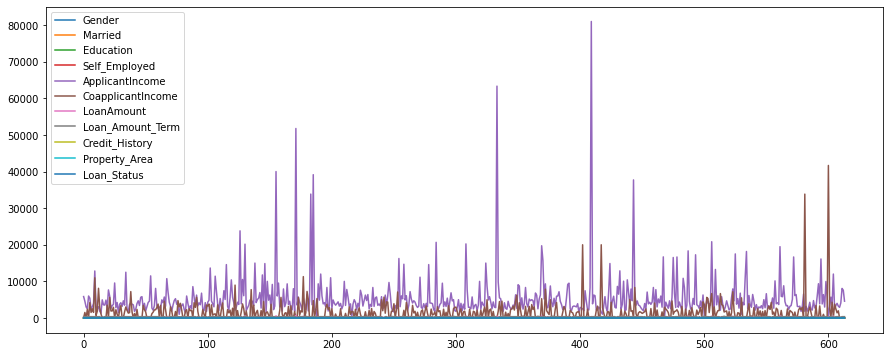

In [22]:
Train.plot(figsize=(15, 6))

In [23]:
Train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,0,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,0,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,1,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,0,0.0,6000,0.0,141.000000,360.0,1.0,2,1


In [24]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [25]:
train_features = ['Credit_History', 'Education', 'Gender']

x_train = Train[train_features].values
y_train = Train['Loan_Status'].values

x_test = Test[train_features].values

In [26]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [27]:
predicted = logistic_model.predict(x_test)

In [28]:
score = logistic_model.score(x_train, y_train)
print('accuracy_score overall :', score)

accuracy_score overall : 0.8094462540716613


In [29]:
print('accuracy_score percent :', round(score*100,2))

accuracy_score percent : 80.94
